## Topic 2: NumPy ndarrays for Working with Gridded Data in Python


In [1]:
import os  # operating system
import numpy as np  # arrays and matrix math
import matplotlib.pyplot as plt  # plotting
from scipy import stats  # summary statistics

### Loading The Dataset

In [2]:
porosity_1d_array = np.fromfile('dataset.dat')
print('porosity_1d_array is a ' + str(type(porosity_1d_array)) + '.')

porosity_1d_array is a <class 'numpy.ndarray'>.


#### Previewing The ndarrays

In [3]:
porosity_1d_array

array([ 9.47058121,  9.91782937,  9.9798204 , ..., 10.76326531,
       10.30917151, 10.86594983])

Notice that NumPy constrains the number of displayed elements.
- This prevents us from attempting an impractical visualization of a large number of elements
- We can use NumPy's set_printoptions() function to control the printing of arrays
- We put input as precision and threshold where precision is the number of decimals, threshold is the number elements to trigger summarization.

In [4]:
np.set_printoptions(precision = 3, threshold=100)
porosity_1d_array

array([ 9.471,  9.918,  9.98 , ..., 10.763, 10.309, 10.866])

#### Checking the Size and Dimensions of ndarrays
Now we have an ndarray to work with. We will check the shape now:
- The ndarray member `[my_ndarray].shape` stores the number of dimensions and the size in each dimension in a tuple (an immutable list)

In [5]:
porosity_1d_array.shape

(10000,)

#### Reshaping The ndarray 
We use the member function `[my_ndarray].reshape()` to restore the loaded 1D array to a 2D ndarray

- The inputs are the original array and the new shape as int or tuple of ints.
- In 2D the standard Python order is left to right for each row from top to bottom
- It is possible to set the order = 'C' for C-like index or 'F' for Fortran index

In [6]:
porosity_map = np.reshape(porosity_1d_array, [100, 100]) # reshaping the 1-d array to 100*100
print('The porosity map has a shape ' + str(porosity_map.shape) + '.')
ny = porosity_map.shape[0] #getting the array ny
nx = porosity_map.shape[1] # getting the array nx
print('Our 2D array has number of x cells = ' + str(nx) + ', and y cells = ' + str(ny) + '.')#checking the reshaping

The porosity map has a shape (100, 100).
Our 2D array has number of x cells = 100, and y cells = 100.


#### Flattening The ndarrays
There are times that we want to 'flatten' a multidimensional array to 1D ndarrays
- There is a member function `[my_ndarray].flatten()` to do this.
- We lose the information on endianness, but in some cases that is desirable, for example, when finding the minimum value over the ndarray or plotting a histogram.

In [7]:
flatten_porosity_map = porosity_map.flatten()#flattening the 2d map
print('The flattened porosity map has a shape ' + str(flatten_porosity_map.shape) + '.')

The flattened porosity map has a shape (10000,).


#### Reading And Writing Binary Files
We will now close the loop write out the array and read it back in, to demonstrate the ndarray output member function `[my_ndarray].tofile()`
- We save the map as binary, read and back in
- We compare the 2 ndarrays with the NumPy function `np.array_equal()`

In [8]:
porosity_map.tofile("porosity_test.dat")#saving 2D array to 1D File
porosity_test = np.fromfile('porosity_test.dat')#reading 1D bindary file back to 1D arrat
check = np.array_equal(porosity_map, np.reshape(porosity_test,[100,100])) #checking if loaded is saved or not
print('Is the array we wrote out and read back in the same as the original array? ' + str(check) + '.')

Is the array we wrote out and read back in the same as the original array? True.


#### Writing ASCII Comma Delimited Files
Now we write our map to an comma delimited ASCII file (*.csv).
- These files are readible in any text editor and are easy to load into MS Excel.

In [9]:
# saving our 2D array to 2D comma delimited
np.savetxt("porosity_map.csv", porosity_map, delimiter=",")

#### Reading ASCII Comma Delimited Files
We can load the 2D map back in and confirm the we have the same ndarray that we started with.

In [10]:
porosity_map_test = np.loadtxt("porosity_map.csv", delimiter=",")#loading the csv
test = np.array_equal(porosity_map, porosity_map_test)#checking if the arrays are the same
print('Is the array we wrote out and read back in the same as the original array? ' + str(test) + '.')
print('The loaded array has a shape ' + str(porosity_map_test.shape) + '.')

Is the array we wrote out and read back in the same as the original array? True.
The loaded array has a shape (100, 100).


### Slicing ndArrays
Just like Pandas DataFrames we can slice NumPy ndarrays.
- Some common notation of slicing is as follows -: all, :5 from 0 to 4, 96: from 96 to end and more advanced - 1:10:3 from 1 through 9, take every 3rd row or column.



In [11]:
# first slice of top left corner
top_corner = porosity_map[:5, :5] #extracting type left corner
print('The type for the slice is ' + str(type(top_corner)) + '.')
print('The shape of the slice is ' + str(top_corner.shape) + '.')
top_corner

The type for the slice is <class 'numpy.ndarray'>.
The shape of the slice is (5, 5).


array([[ 9.471,  9.918,  9.98 ,  9.916, 10.699],
       [ 8.676,  8.945,  9.267, 10.003, 11.012],
       [ 9.139,  8.934,  9.878, 10.908, 10.909],
       [ 8.335,  8.695,  9.284, 10.609, 11.524],
       [ 9.359,  9.917, 10.049, 10.772, 11.161]])

> Here we are extracting the first column of the top corner. This is the furthest left column of the top corner.

In [12]:
first_column = top_corner[:, 0]#extracting the first column
print('The shape of the slice is ' + str(first_column.shape) + '.')
first_column

The shape of the slice is (5,).


array([9.471, 8.676, 9.139, 8.335, 9.359])

> Here we have example where we extract the bottom 2 rows.



In [13]:
last_2_rows = top_corner[-2:, :]
print('The shape of the slice is ' + str(last_2_rows.shape) + '.')
last_2_rows

The shape of the slice is (2, 5).


array([[ 8.335,  8.695,  9.284, 10.609, 11.524],
       [ 9.359,  9.917, 10.049, 10.772, 11.161]])

> Checking slicing is deep or shallow copy

In [14]:
print('The original value for porosity_map at [99,99] is ' + str(porosity_map[99, 99]) + '.')
bottom_right_corner = porosity_map[-3:, -3:]# make a slice
bottom_right_corner[2, 2] = -13.0 # changing a value in our slice
porosity_map # checking the original ndarray

The original value for porosity_map at [99,99] is 10.865949834361123.


array([[  9.471,   9.918,   9.98 , ...,   8.087,   7.999,   7.675],
       [  8.676,   8.945,   9.267, ...,   9.101,   8.915,   8.722],
       [  9.139,   8.934,   9.878, ...,   8.432,   9.246,   8.535],
       ...,
       [  8.356,   9.193,   9.207, ...,  10.641,  12.386,  12.626],
       [  8.733,   9.15 ,   9.277, ...,  11.116,  11.357,  11.885],
       [  9.096,   9.749,  10.012, ...,  10.763,  10.309, -13.   ]])

> As we can see slicing is a shallow copy, when we modify a slice the original ndarray is updated.

In [15]:
# restoring the value of the lower right element in our 2D ndarray
porosity_map[-1:, -1:] = 10.866

#### Reading Elements from ndarrays
> Here we extract a specific element. When we do this a single value is returned, type is the element type and not an ndarray.

In [16]:
single_element = porosity_map[2, 2]#extracting an element
# single_element = porosity_map[2][2]  # this does the same thing
print('The type for a single element is ' + str(type(single_element)) + '.')
single_element

The type for a single element is <class 'numpy.float64'>.


9.877516184936288

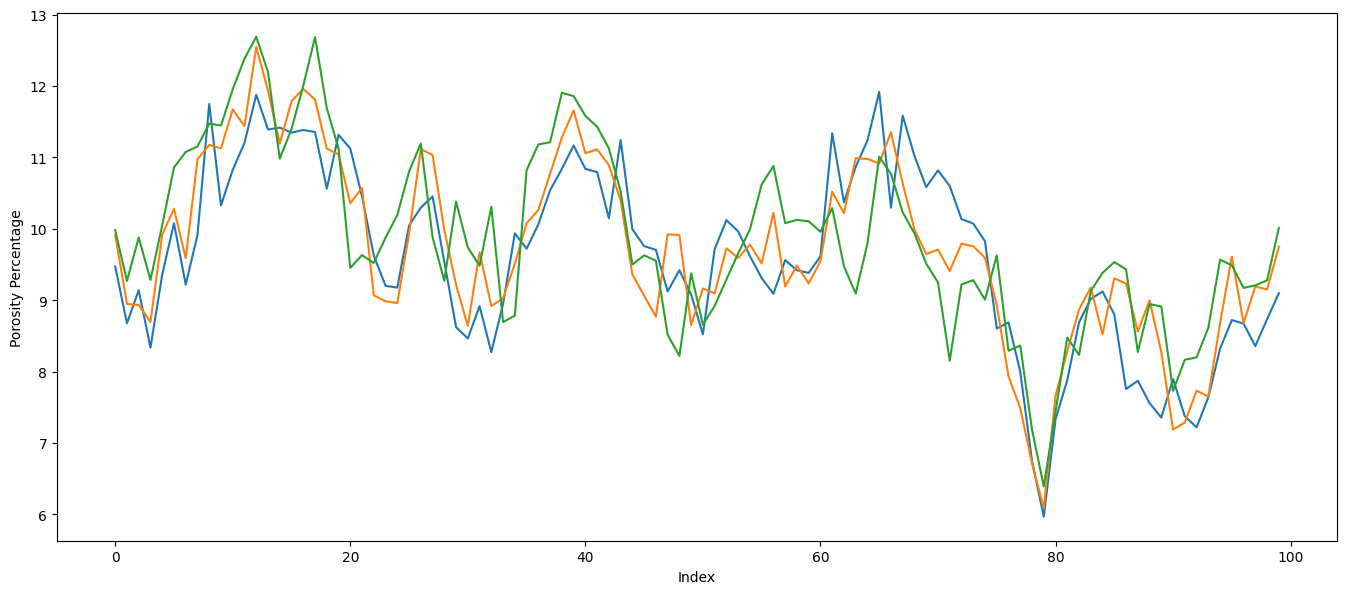

In [19]:
plt.plot(porosity_map[:, :3])# plotting the first 3 columns
plt.xlabel('Index')
plt.ylabel('Porosity Percentage') # adding label to the axis
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1,wspace=0.2,hspace=0.2)# setting the plot scale
plt.show() # close the plot

> We can also explicity, separately plot columns and rows.

Note, I can mix rows and columns since we explicity state the index and to explicitly provide the index we use NumPy.linspace() to get an array of 0,1,2...,98,99

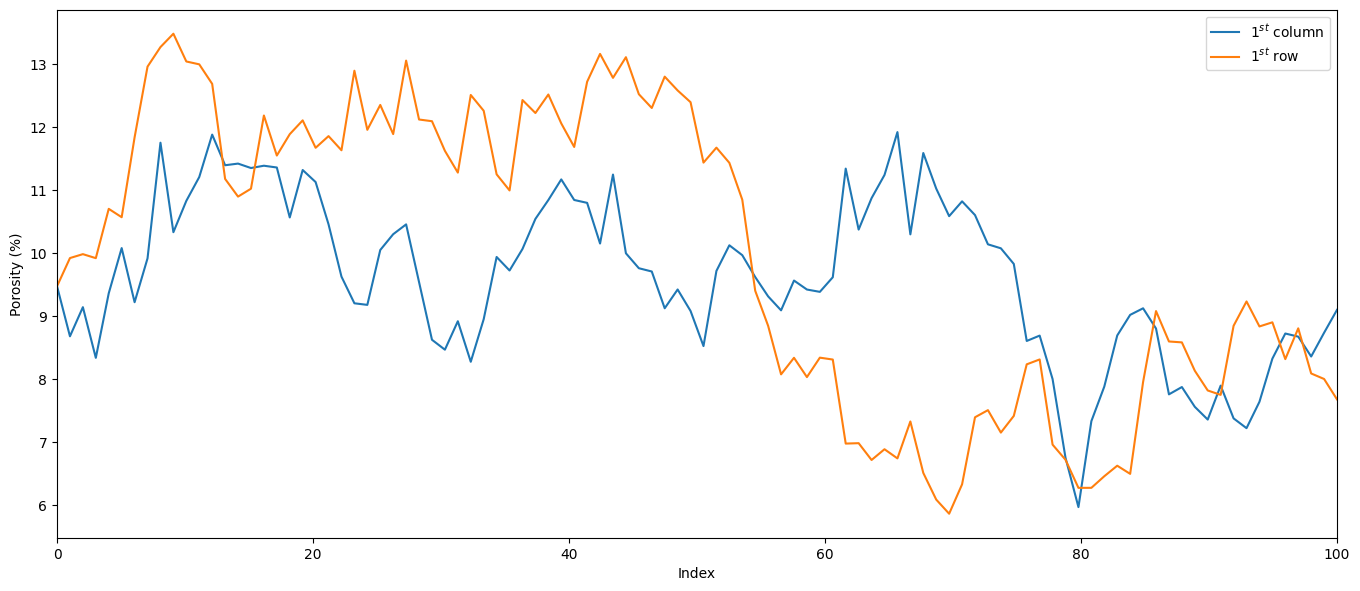

In [21]:

plt.plot(np.linspace(0, 100, 100), porosity_map[:, 0], label='$1^{st}$ column') # plotting the first column
plt.plot(np.linspace(0, 100, 100), porosity_map[0, :], label='$1^{st}$ row')
plt.xlim([0, 100]) # specify the min and max
plt.xlabel('Index')
plt.ylabel('Porosity (%)')  # add labels to axes
plt.legend()                                    # add a legend
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)  # set the plot scale
plt.show()                                      

#### Specifying The Coordinates

> In order to plot a 2D ndarray we need to know the coordinates.<br>

A simple specification is possible by assuming:
- equal element sizes, regular grid.
- alignment with the X and Y coodinates, no rotation.

Also we specify the following:
- extents of the array in X, xmin and xmax, and Y, ymin and ymax.
- cell size.
- color bar, extents of feature, vmin and vmax and color map inferno.

**The vmin and vmax keywords are used to normalize the data you provide, so it is between 0 and 1, and can therefore be mapped according to the colormap.**

In [22]:
xmin = 0.0;
xmax = 1000.0;
ymin = 0.0;
ymax = 1000.0;
cell_size = 10.0;
vmin = 4.0;
vmax = 16.0;
cmap = plt.cm.inferno

### Statistics From ndArrays

> Now we try some summary statistics with a function from `SciPy.`

Many stats methods expect a 1D array, so we must flatten the 2D ndarray. **If we don't flatten, we will get separate summary statistics for each column.**

In [23]:
stats.describe(porosity_map.flatten()) # different summary stats

DescribeResult(nobs=10000, minmax=(3.907361729887783, 15.807357455360307), mean=10.000000005016563, variance=4.000400048693306, skewness=0.13942790638620003, kurtosis=-0.5302829766005894)

> We can also have a variety of ndarray member functions for statistics.

**The calculation is completed over all elements without the need for flattening.**

In [24]:
mean_por = porosity_map.mean()# individual summary statistics
stdev_por = porosity_map.std()
min_por = porosity_map.min()
max_por = porosity_map.max()
print('Summary Statistics of Porosity \n Mean = ' + str(mean_por) + ', StDev = ' + str(stdev_por))
print(' Min = ' + str(min_por) + ', Max = ' + str(max_por))

Summary Statistics of Porosity 
 Mean = 10.000000005016563, StDev = 2.000000002172109
 Min = 3.907361729887783, Max = 15.807357455360307


### Checking Missing Values

> We can also check for invalid or missing values, NaNs (Not a Number), in our ndarray.

- We use the NumPy function `NumPy.isnan()` to return a boolean array of same size (True if NaN) and then we use `[my_ndarray].any()` to check for any True values.

In [25]:
porosity_map[0, 1] = np.nan # adding NaN
porosity_map[2, 1] = np.nan # adding another NaN
result = np.isnan(porosity_map).any()
print('Are there any missing values in this array? ' + str(result))

Are there any missing values in this array? True


#### Finding The Missing Values in a ndarray

> Now we have NaN's in our ndarray, let's demonstrate how to find them.

 - NaN's could cause issues with our calculations and we can get a list of indices of the elements in our ndarray with NaN's.
 - We use the `NumPy.argwhere()` function to return the indices with True in the 2D boolean ndarray.

In [26]:
# get list of indices of array with NaNs
nan_list = np.argwhere(np.isnan(porosity_map))
print('The indices with missing values are:\n' + str(nan_list) + '.')

The indices with missing values are:
[[0 1]
 [2 1]].


> Now that we have identified the precense of missing values we can update them.
 - `NumPy.nan_to_num()` function can be to replace the NaN values with a constant.

In [27]:
porosity_map = np.nan_to_num(porosity_map, nan=0.01)#replace NaN values
porosity_map

array([[9.471e+00, 1.000e-02, 9.980e+00, ..., 8.087e+00, 7.999e+00,
        7.675e+00],
       [8.676e+00, 8.945e+00, 9.267e+00, ..., 9.101e+00, 8.915e+00,
        8.722e+00],
       [9.139e+00, 1.000e-02, 9.878e+00, ..., 8.432e+00, 9.246e+00,
        8.535e+00],
       ...,
       [8.356e+00, 9.193e+00, 9.207e+00, ..., 1.064e+01, 1.239e+01,
        1.263e+01],
       [8.733e+00, 9.150e+00, 9.277e+00, ..., 1.112e+01, 1.136e+01,
        1.189e+01],
       [9.096e+00, 9.749e+00, 1.001e+01, ..., 1.076e+01, 1.031e+01,
        1.087e+01]])

### Boolean Operations with ndarrays

> We can use any boolean operation to filter and search over ndarrays.<br>

Let's visualize this this boolean ndarray. Output is True (1) and False (0).
- This returns a boolean array of the same size of the original array.
- True when the condition holds and False otherwise.

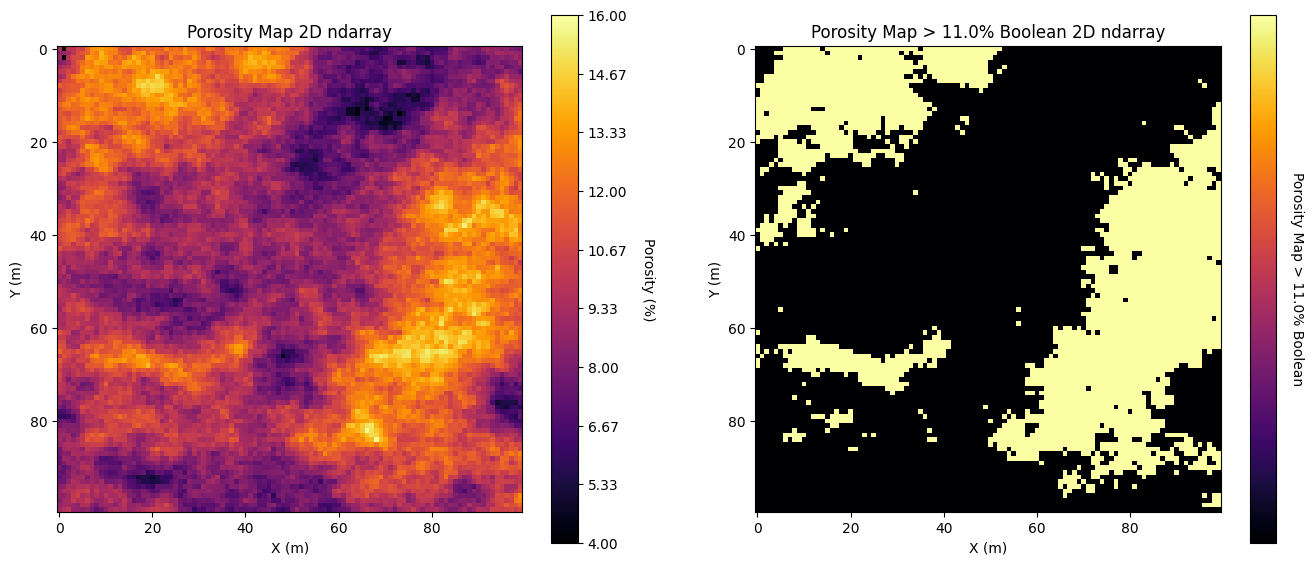

In [29]:
threshold = 11.0 #selecting a porosity threshold
indicator_map = porosity_map > threshold #applying operator

plt.subplot(121) # plotting the original porosity map
im = plt.imshow(porosity_map, vmin=vmin, vmax=vmax, cmap=cmap)#plotting 2d array
plt.xlabel('X (m)');
plt.ylabel('Y (m)'); plt.title('Porosity Map 2D ndarray')#labeling the axes
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10))  # making a color bar
cbar.set_label('Porosity (%)', rotation=270,labelpad=20)  #labeling the color bar

plt.subplot(122)# plotting the boolean map
im = plt.imshow(indicator_map, vmin=0.0, vmax=1.0,cmap=cmap)  # plotting the 2D array
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title("Porosity Map > " + str(threshold) +"% Boolean 2D ndarray")  # labelling the axes
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10))  # making a color bar
cbar.set_label("Porosity Map > " + str(threshold) + "% Boolean",rotation=270, labelpad=20)  # labelling the color bar
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)  # setting the plot scale
plt.show()

> We can extract the samples based on a 2D boolean ndarray the same size as the original ndarray

- We pass the boolean array to the original ndarray.
- The output is a 1D ndarray with all the element associated with the true values.

In [30]:
my_array = np.array([[1, 2], [3, 4]])# making a simple ndarray
print('My original array: \n ' + str(my_array))# making a simple boolean array
my_boolean_array = np.array([[True, False], [False, True]])
print('\n My boolean array: \n ' + str(my_boolean_array))# extracting the values at True indices
true_values = my_array[my_boolean_array]

print('The extracted elements ' + str(true_values))
true_values

My original array: 
 [[1 2]
 [3 4]]

 My boolean array: 
 [[ True False]
 [False  True]]
The extracted elements [1 4]


array([1, 4])